# MVC (Multi-Variate Calculus), Spring 2022
#### Numerical Estimation Integrator 

(yes, this is copied from the readme...but it's here for when I want to export the ipynb only)

>"the deeper into \[complex\] math/physics you go...there is a tension bewtween making problems that are easy to solve, but also boring and pointless, with problems that are interesting, but harder to solve" 
>
> \- my math teacher Andrew Alexander

Multi-variate calculus can be a fickle subject. Besides terrible colour projections on 3-dimensional graphs and strange countour lines, we cannot even properly visualise functions or expressions with dimensionality greater than 3. When students learn about line integrals (a.k.a. path integrals), a problem arises. How do we create interesting integrals for students? The short answer, as the above quote suggests, is that we have two choices, either making boring integrals, which means students don't get the opportunity to be "in the weeds," solving realistic problems, or we choose integrals that work out in such a way that they are difficult to solve by hand (as another MVC teacher put the integral this program was written to solve, "I don't even know where to start with this"). In such situations, it is useful to have a calculator to be able to numerically estimate such integrals. This is such a calculator.

Additionally, this calculator can be used for non-multivariable (though it does require pre-parameterisation such that there is only one input and one output variable in MVC contexts) applications, though admittedly, if you are currently learning single-variable calculus, be honest and do your homework without cheating. It'll help you out a lot, trust me. This program for my MVC class was born out of a single-variable calculus concept, so that's at minimum proof that the concepts covered here are applicable.

#### This code defines all the necessary functions, and imports necessary libraries:

i.e. just run this and don't worry about it, unless you're curious about how the calculator works

alternatively, you could alter it to change the numerical integration algorithm, such as creating trapezoidal approximations for the function instead of rectangular ones, but it does take some effort.

In [1]:
# ----- import important libraries -----

from cmath import pi
import math
import pprint
import argparse

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

# ----- define helpful built-in functions -----


def __sumList__(input_list: list):
    """

    sums the numerical values of a list

    Parameters:
    -----------

    input_list: list
        list containing the numbers to be summed

    Returns:
    --------

    sum: number (int, float, etc.)
        sum of the numbers in the input_list

    """

    sum = 0
    for element in input_list:
        sum += element

    return sum

# ----- define a two-variable integral estimation function -----


def estimateDefinedIntegral(function, lower, upper, steps):
    """

    a numerical method of estimating the value of a defined integral (hopefully one that is unsolvable symbollically)

    Parameters:
    -----------

    function: function reference (use lambda)
        lambda expression representing what the function is integrating for (the integrand). must be formatted in the numpy style (https://www.geeksforgeeks.org/numpy-mathematical-function/) with variable x.

    lower: number (int, float, etc.)
        number representing the lower bound for definite integration.

    upper: number (int, float, etc.)
        number representing the upper bound for definite integration.

    step_size: number (int, float, etc.)
        number representing the step count to use for estimation of definite integration.

    Returns:
    --------

    sum: number (int, float, etc.)
        number representing the numerical estimation of the definite integral.

    step_values: list
        list containing the x values at which rectangular approximations are calculated, mostly for the purpose of creating a pretty plot.

    step_heights: list
        list containing the y values derived from the step_values, mostly for the purpose of creating a pretty plot.

    step_width: number (int, float, etc.)
        number representing the distance between x-steps used for numerical integration, mostly for the purposes of creating a pretty plot.

    """

    # ----- calculate the size of steps needed in the range -----

    step_size = (upper - lower)/steps

    # ----- calculate the height of each step in the range, calculated on the lower bound -----

    step_values = []
    for i in range(0, steps):
        step_values.append((step_size * i) + lower)

    step_heights = []
    for value in step_values:
        step_heights.append(function(value))

    # ----- sum the step_heights * step_values, then return it as a numerical estimation -----
    areas_list = []
    for i in range(0, len(step_values)):
        areas_list.append(step_size * step_heights[i])

    # # for debugging purposes
    # pprint.pprint(step_values)
    # pprint.pprint(step_heights)
    # pprint.pprint(areas_list)

    # return the sum and plot
    return __sumList__(areas_list), step_values, step_heights, step_size

# ----- define a two-variable numerical integration grapher function -----


def graphDefinedIntegralEstimation(function, step_values, step_heights, step_size, graph_x_offset=100, graph_y_offset=100):
    """

    creates a pretty graph of a numerical integration estimation using matplotlib

    Parameters:
    -----------

    function: function reference (use lambda)
        lambda expression representing what the function is integrating for (the integrand). must be formatted in the numpy style (https://www.geeksforgeeks.org/numpy-mathematical-function/) with variable x.

    step_values: list
        list containing the x values at which rectangular approximations are calculated.

    step_heights: list
        list containing the y values derived from the step_values.

    step_width: number (int, float, etc.)
        number representing the distance between x-steps used for numerical integration.

    graph_x_offset: int (optional)
        integer representing the offset to be used for the graph in the x direction. defaults to 100.

    graph_y_offset: int (optional)
        integer representing the offset to be used for the graph in the y direction. defaults to 100.

    Returns:
    --------

    plot: matplotlib plot object
        plot object from matplotlib, containing the graph of the numerical integration estimation.

    """

    fig, ax = plt.subplots()

    # plot settings
    plt.title('two-variable numerical integral estimation')
    plt.ylabel('f(x)')
    plt.xlabel('x')

    plt.axhline(0, color='grey')  # x = 0
    plt.axvline(0, color='grey')  # y = 0

    # plot rectangle approximations
    for i in range(0, len(step_values)):

        # for values >= 0:
        if step_heights[i] >= 0:
            ax.add_patch(ptch.Rectangle(
                (step_values[i], 0), step_size, step_heights[i], alpha=0.5, ec="black"))

        # for values < 0:
        else:
            ax.add_patch(ptch.Rectangle(
                (step_values[i], step_heights[i]), step_size, -step_heights[i], alpha=0.5, ec="black"))

    # ensure correct x-y axis, according to the given offsets
    x_range = (step_values[0] - graph_x_offset,
               step_values[-1] + step_size + graph_x_offset)
    y_range = (step_heights[0] - graph_y_offset,
               step_heights[-1] + graph_y_offset)

    plt.xlim(x_range)
    plt.ylim(y_range)

    # plot function approximation as a curve/line
    x_curve_values = np.linspace(x_range[0]*10000, x_range[1]*10000, 10000000)
    y_curve_values = function(x_curve_values)
    plt.plot(x_curve_values, y_curve_values, color="red")

    # plot points used to calculate rectangle approximation areas
    plt.scatter(step_values, step_heights, marker='o', color="black", s=10)

    return plt


#### Change the following variables for your specific problem:

In [9]:
function_string = "(np.sin(x) * np.cos(x**2) + 5) * (np.sqrt(1 + 4*x**2))" #this represents the function (integrand) you are integrating for


# remember that it must be formatted in the numpy style, but in a string! (https://www.geeksforgeeks.org/numpy-mathematical-function/)
# for the problem I wrote this program for, the string is "(np.sin(x) * np.cos(x**2) + 5) * (np.sqrt(1 + 4*x**2))"

lower = 0 #this represents the lower bound to numerically integrate across
upper = 2*pi #this represents the upper bound to numerically integrate across
steps = 100 #this is the number of rectangles to use to estimate the integral

x_offset = 5 #this represents the units of graph excess in the x direction
y_offset = 5 #this represents the units of graph excess in the y direction

#### Then, run this cell to get a numerical answer to your integration problem:

In [10]:
def f(x): return eval(function_string)

# estimator
print(f"numerically integrating {function_string}, from {str(lower)} to {str(upper)}, using {str(steps)} rectangles.")
sum, step_values, step_heights, step_size = estimateDefinedIntegral(f, lower, upper, steps)
print(f"result: {str(sum)} \n")

numerically integrating (np.sin(x) * np.cos(x**2) + 5) * (np.sqrt(1 + 4*x**2)), from 0 to 6.283185307179586, using 100 rectangles.
result: 199.864021077379 



#### And if you want to see a graphical representation of this estimation, run this:

plot not looking right? here are some tips for things to check:
- check your offsets; it's possible you forgot to set them properly
- everything under the curve look black? probably because you integrated across a large number of rectangles, but it doesn't change the calculation any.

creating plot of the integration... 



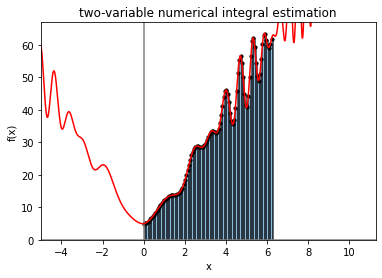

In [11]:
# grapher, using the results from the estimator
print("creating plot of the integration... \n")
plot = graphDefinedIntegralEstimation(f, step_values, step_heights, step_size, graph_x_offset=x_offset, graph_y_offset=y_offset)
plot.show()